## ST236 Group 17
### Group Members:

* Victoria Li: u5568587
* Callum Green: u5546208
* Phurich Rachawat: u5548642
* Aamna Zulfiqar: u5512747
* Zhe Kai Ng: u5565323

### Relevant Packages


In [112]:
%pip install seaborn
%pip install tabulate
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Task 1


In [114]:
# Load datasets
gdp_df = pd.read_csv("GDP by Country 1999-2022.csv")
pop_df = pd.read_csv("World Population by Country 1970-2023.csv")

# Rename GDP columns to "year GDP" format, "Country" to "country"
gdp_years = [str(year) for year in range(1999, 2023)]
gdp_rename_dict = {year: f"{year} GDP" for year in gdp_years}
gdp_rename_dict['Country'] = 'country'
gdp_df = gdp_df.rename(columns=gdp_rename_dict)

# Rename countries which do not have the same name
rename_dict = {
    gdp_df.iloc[0, 0]: "Afghanistan",
    gdp_df.iloc[10, 0]: "Bahamas",
    gdp_df.iloc[23, 0]: "Brunei",
    gdp_df.iloc[37, 0]: "DR Congo",
    gdp_df.iloc[38, 0]: "Republic of the Congo",
    gdp_df.iloc[40, 0]: "Ivory Coast",
    gdp_df.iloc[59, 0]: "Gambia",
    gdp_df.iloc[76, 0]: "Iran",
    gdp_df.iloc[88, 0]: "Kyrgyzstan",
    gdp_df.iloc[89, 0]: "Laos",
    gdp_df.iloc[71, 0]: "Hong Kong",
    gdp_df.iloc[86, 0]: "South Korea",
    gdp_df.iloc[97, 0]: "North Macedonia",
    gdp_df.iloc[134, 0]: "Sao Tome and Principe",
    gdp_df.iloc[141, 0]: "Slovakia",
    gdp_df.iloc[147, 0]: "Saint Kitts and Nevis",
    gdp_df.iloc[148, 0]: "Saint Lucia",
    gdp_df.iloc[149, 0]: "Saint Vincent and the Grenadines",
    gdp_df.iloc[152, 0]: "Eswatini",
    gdp_df.iloc[155, 0]: "Syria",
    gdp_df.iloc[156, 0]: "Taiwan",
    gdp_df.iloc[160, 0]: "Timor-Leste",
    gdp_df.iloc[177, 0]: "Yemen",
}

gdp_df["country"] = gdp_df["country"].replace(rename_dict)


# Merge datasets on country name
merged_df = pd.merge(gdp_df, pop_df, on="country", how="inner")

base_cols = ["country", "growth rate", "world percentage","density", "area (km²)"] # what columns do you even want? change this line accordingly

# Filter to get GDP and population columns
gdp_cols = [col for col in merged_df.columns if "GDP" in col]
# pop_cols = [col for col in merged_df.columns if "population" in col] # all population cols
pop_cols = [col for col in merged_df.columns if "population" in col and int(col.split()[0]) in range(1999, 2023)] # population cols from 1999 to 2022

all_cols = base_cols + gdp_cols + pop_cols

# Keep only columns that exist in df while preserving order
df = merged_df[merged_df.columns.intersection(all_cols)].copy()

print(df)
#df.to_csv("merged_data0.csv", index= False)


                 country 1999 GDP 2000 GDP 2001 GDP 2002 GDP 2003 GDP  \
0            Afghanistan        0        0        0    4.084    4.585   
1                Albania    3.444    3.695    4.096    4.456      5.6   
2                Algeria   48.845   54.749   55.181   57.053   68.013   
3                 Angola    6.153    9.135    8.936   11.386   13.956   
4    Antigua and Barbuda    0.652    0.678     0.71    0.718    0.754   
..                   ...      ...      ...      ...      ...      ...   
175            Venezuela   97.977  117.153  122.872   92.889   83.442   
176              Vietnam   28.684   31.196   32.504   35.148    39.63   
177                Yemen     7.53    9.561    9.533    9.985   11.869   
178               Zambia    3.132    3.238     3.64    3.775    4.326   
179             Zimbabwe    5.963    8.136   12.883   30.856   10.515   

    2004 GDP 2005 GDP  2006 GDP 2007 GDP  ... 2022 GDP 2000 population  \
0      5.971    7.309       NaN    9.892  ...    

In our dataframe, we included only the years where both GDP and population data overlap. The GDP dataset spans from 1999 to 2022, while the population dataset covers 1970 to 2023, making 1999–2022 the common range. Including population data from years outside this range would result in NaN values in the GDP columns, complicating analysis.

Although population data is recorded approximately every five years, whereas GDP data is available annually, we chose to retain all available GDP data. One could argue for including only GDP data every five years to match the population intervals. However, since later parts of the coursework involve independent GDP analysis, having more data points ensures more meaningful insights.

## Task 2

In [117]:
print("Data Types of the df with only relevant features:")
print(df.dtypes)

Data Types of the df with only relevant features:
country              object
1999 GDP             object
2000 GDP             object
2001 GDP             object
2002 GDP             object
2003 GDP             object
2004 GDP             object
2005 GDP             object
2006 GDP            float64
2007 GDP             object
2008 GDP             object
2009 GDP             object
2010 GDP             object
2012 GDP             object
2013 GDP             object
2014 GDP             object
2015 GDP            float64
2016 GDP             object
2017 GDP             object
2018 GDP             object
2019 GDP             object
2020 GDP             object
2021 GDP             object
2022 GDP             object
2000 population       int64
2005 population     float64
2010 population       int64
2015 population     float64
2020 population     float64
2022 population       int64
area (km²)          float64
growth rate          object
world percentage     object
dtype: object


Running **print(df.dtypes)** reveals that most GDP columns are stored as objects, meaning the columns have mixed data types, possibly combination of string and numeric, which the former can happen when there is commma in the numbers, except for 2006 and 2015, which are already floats. Therefore we can implement a loop on all GDP columns, converting to strings, remove the commas, and convert it back to numeric, doing this iteratively.

The population columns are a mix of int64 and float64, while the base columns (country, area, and growth rate) are primarily stored as objects, except for area, which is already a float. Although both int64 and float64 are numeric types, some missing values (NaN) exist in the dataset. Since int64 cannot represent NaN values, but float64 can, converting all numerical columns to float64 ensures consistency. This also prevents implicit casting issues and accounts for potential decimal values in GDP.

Furthermore, country, the only non-numeric column, contains only text and can be safely converted to a string type.

For growth rate and world percentage, performing a close inspection into the data by looking at the csv file, we can find that they are in string form due to the % sign, so we convert it into string, remove the % symbol, then safely convert back to float.

In [119]:
for col in gdp_cols:
    # Convert to string in case there are non‐strings
    df[col] = df[col].astype(str)
    # Remove commas (and possibly other characters)
    df[col] = df[col].str.replace(',', '', regex=False).str.strip()
    # Now safely convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')


df[pop_cols] = df[pop_cols].astype('float64') #converting population columns to floats, replacing non numerics with NaN

df["growth rate"] = (
    df["growth rate"]
    .astype(str)                         # force everything to string
    .str.replace('%', '', regex=True)    # strip out the '%' symbol
    .astype(float)                       # finally convert to float
)
 #Taking out percentage sign, then converting to float

df["world percentage"] = (
    df["world percentage"]
    .astype(str)                         # force everything to string
    .str.replace('%', '', regex=True)    # strip out the '%' symbol
    .astype(float)                       # finally convert to float
)
 #Taking out percentage sign, then converting to float
 
df["country"] = df["country"].astype("string") #Converting into a string


In [120]:
print(df.dtypes)


country             string[python]
1999 GDP                   float64
2000 GDP                   float64
2001 GDP                   float64
2002 GDP                   float64
2003 GDP                   float64
2004 GDP                   float64
2005 GDP                   float64
2006 GDP                   float64
2007 GDP                   float64
2008 GDP                   float64
2009 GDP                   float64
2010 GDP                   float64
2012 GDP                   float64
2013 GDP                   float64
2014 GDP                   float64
2015 GDP                   float64
2016 GDP                   float64
2017 GDP                   float64
2018 GDP                   float64
2019 GDP                   float64
2020 GDP                   float64
2021 GDP                   float64
2022 GDP                   float64
2000 population            float64
2005 population            float64
2010 population            float64
2015 population            float64
2020 population     

In [124]:
display(df)
df.to_csv("merged_data1.csv", index= False)

,country,1999 GDP,2000 GDP,2001 GDP,2002 GDP,2003 GDP,2004 GDP,2005 GDP,2006 GDP,2007 GDP,...,2022 GDP,2000 population,2005 population,2010 population,2015 population,2020 population,2022 population,area (km²),growth rate,world percentage
0,Afghanistan,0.000,0.000,0.000,4.084,4.585,5.971,7.309,NaN,9.892,...,0.000,19542982.0,NaN,28189672.0,33753499.0,38972230.0,41128771.0,652230.0,2.70,0.53
1,Albania,3.444,3.695,4.096,4.456,5.600,7.452,8.376,NaN,10.163,...,18.012,3182021.0,NaN,2913399.0,2882481.0,2866849.0,2842321.0,28748.0,-0.35,0.04
2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.380,NaN,116.158,...,168.195,30774621.0,NaN,35856344.0,39543154.0,43451666.0,44903225.0,2381741.0,1.57,0.57
3,Angola,6.153,9.135,8.936,11.386,13.956,19.800,30.632,NaN,55.370,...,74.953,16394062.0,NaN,23364185.0,NaN,33428485.0,35588987.0,1246700.0,3.08,0.46
4,Antigua and Barbuda,0.652,0.678,0.710,0.718,0.754,0.818,0.875,NaN,1.026,...,1.534,75055.0,NaN,85695.0,89941.0,92664.0,93763.0,442.0,0.57,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,97.977,117.153,122.872,92.889,83.442,112.800,143.443,NaN,219.372,...,43.546,24427729.0,NaN,28715022.0,30529716.0,28490453.0,28301696.0,916445.0,1.90,0.36
176,Vietnam,28.684,31.196,32.504,35.148,39.630,45.548,53.053,NaN,68.298,...,415.493,79001142.0,NaN,87411012.0,92191398.0,96648685.0,98186856.0,331212.0,0.68,1.23
177,Yemen,7.530,9.561,9.533,9.985,11.869,13.565,15.193,NaN,21.657,...,NaN,18628700.0,NaN,24743946.0,28516545.0,32284046.0,33696614.0,527968.0,2.24,0.43
178,Zambia,3.132,3.238,3.640,3.775,4.326,5.440,7.271,NaN,10.104,...,23.967,9891136.0,NaN,13792086.0,16248230.0,18927715.0,20017675.0,752612.0,2.76,0.26


## Task 3 and 4

We use the *.describe* attribute to look at the rough structure of the dataframe. From inspecting *merged_data0.csv* and *summary_stats.csv*, we can conclude that the value 0 among the GDP and population columns are the implausible values. Therefore we could do imputation to all these values by using the MICE algorithm **<- Task 3**. The minimum value of 0 under column *world percentage* is justifiable since, their respective population values are small. The negative population growth rate of -7.45 for Ukraine is justifiable given its population numbers. Some columns such as *2004, 2005 GDP* and *2015, 2020 population* etc have less count values less than 180, indicating missing values, these missing values can also be imputed by the MICE algorithm which we are demonstrating later **<- Task 4**. Particularly, the column *2006 GDP* and *2005 population* is missing entirely, therefore imputation does not work, so we can remove this column. **<- Task 4**. Furthermore, we observe that *2015 GDP* is entirely 0 with 1 missing value (NaN), therefore imputing does not work and we can also remove this column.

From summary_stats, we also observe that the GDP is heavily positive-skewed, and the population is slightly positive-skewed. We also observe growth rate is slight positive-skewed and world percentage is heavily positive-skewed. We may rectify this by log transforming, note that growth rate contains negative values thus we cannot use exclude it from log transformation.



In [130]:
numeric_cols = df.select_dtypes(include=[float, int]).columns

print("Summary stats:")
summary_stats = df[numeric_cols].describe()  
display(summary_stats)  # show the describe() output on screen

#summary_stats.to_csv("summary_stats.csv", index=True)  # read into csv file for close inspection          

Summary stats:


,1999 GDP,2000 GDP,2001 GDP,2002 GDP,2003 GDP,2004 GDP,2005 GDP,2006 GDP,2007 GDP,2008 GDP,...,2022 GDP,2000 population,2005 population,2010 population,2015 population,2020 population,2022 population,area (km²),growth rate,world percentage
count,180.000000,180.000000,180.000000,180.000000,180.000000,179.000000,179.000000,0.0,180.000000,180.000000,...,178.000000,1.800000e+02,0.0,1.800000e+02,1.780000e+02,1.780000e+02,1.800000e+02,1.800000e+02,180.000000,180.000000
mean,168.096472,176.550372,175.371694,182.223261,204.859106,228.062749,249.956966,NaN,286.582256,304.204306,...,558.217972,3.348691e+07,NaN,3.819589e+07,4.086338e+07,4.278808e+07,4.359972e+07,7.307715e+05,1.081000,0.549611
std,798.325383,838.978549,843.924842,868.145059,924.080951,1001.020452,1056.500197,NaN,1161.851929,1219.203898,...,2400.936774,1.265063e+08,NaN,1.406102e+08,1.483854e+08,1.542680e+08,1.547126e+08,1.978174e+06,1.306947,1.941448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056000,NaN,0.062000,0.000000,...,0.000000,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,4.765700e+04,2.610000e+02,-7.450000,0.000000
25%,1.862250,1.884750,2.075250,2.334250,2.719750,3.522500,4.208500,NaN,4.899750,5.336750,...,8.799000,1.905961e+06,NaN,2.097910e+06,2.332522e+06,2.553300e+06,2.703274e+06,2.885900e+04,0.337500,0.030000
50%,7.929500,8.934000,9.470000,9.683000,11.012000,13.063000,15.826000,NaN,19.610000,21.555000,...,40.186000,6.482192e+06,NaN,8.092632e+06,8.799536e+06,9.415248e+06,9.743870e+06,1.451405e+05,0.930000,0.125000
75%,57.792750,71.185750,68.595250,72.709500,80.071500,96.742500,111.269000,NaN,142.556000,150.439500,...,294.343500,2.022910e+07,NaN,2.597143e+07,2.878234e+07,3.072084e+07,3.353106e+07,5.588630e+05,1.922500,0.430000
max,9268.430000,9816.980000,10127.950000,10469.600000,10960.750000,11712.480000,12455.830000,NaN,13770.310000,14418.480000,...,24796.080000,1.264099e+09,NaN,1.348191e+09,1.393715e+09,1.424930e+09,1.425887e+09,1.709824e+07,4.980000,17.850000


We remove the entirely empty columns

In [133]:
# Removes columns that have all NaN values
df.dropna(axis='columns', how='all', inplace=True)
# Remove column 2015 GDP
df.drop(columns=["2015 GDP"], inplace=True)


# Checking if it is actually removed
print("Shape of DataFrame after dropping empty columns:", df.shape)
print("Columns now in DataFrame:", df.columns)
display(df.head())
#df.to_csv("merged_data2.csv", index= False)


Shape of DataFrame after dropping empty columns: (180, 30)
Columns now in DataFrame: Index(['country', '1999 GDP', '2000 GDP', '2001 GDP', '2002 GDP', '2003 GDP',
       '2004 GDP', '2005 GDP', '2007 GDP', '2008 GDP', '2009 GDP', '2010 GDP',
       '2012 GDP', '2013 GDP', '2014 GDP', '2016 GDP', '2017 GDP', '2018 GDP',
       '2019 GDP', '2020 GDP', '2021 GDP', '2022 GDP', '2000 population',
       '2010 population', '2015 population', '2020 population',
       '2022 population', 'area (km²)', 'growth rate', 'world percentage'],
      dtype='object')


,country,1999 GDP,2000 GDP,2001 GDP,2002 GDP,2003 GDP,2004 GDP,2005 GDP,2007 GDP,2008 GDP,...,2021 GDP,2022 GDP,2000 population,2010 population,2015 population,2020 population,2022 population,area (km²),growth rate,world percentage
0,Afghanistan,0.000,0.000,0.000,4.084,4.585,5.971,7.309,9.892,11.513,...,0.000,0.000,19542982.0,28189672.0,33753499.0,38972230.0,41128771.0,652230.0,2.70,0.53
1,Albania,3.444,3.695,4.096,4.456,5.600,7.452,8.376,10.163,11.131,...,16.770,18.012,3182021.0,2913399.0,2882481.0,2866849.0,2842321.0,28748.0,-0.35,0.04
2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.380,116.158,126.889,...,163.812,168.195,30774621.0,35856344.0,39543154.0,43451666.0,44903225.0,2381741.0,1.57,0.57
3,Angola,6.153,9.135,8.936,11.386,13.956,19.800,30.632,55.370,67.608,...,70.339,74.953,16394062.0,23364185.0,NaN,33428485.0,35588987.0,1246700.0,3.08,0.46
4,Antigua and Barbuda,0.652,0.678,0.710,0.718,0.754,0.818,0.875,1.026,1.074,...,1.405,1.534,75055.0,85695.0,89941.0,92664.0,93763.0,442.0,0.57,0.00


We decided to use the IQR with a standard multiplier of 1.5 to determine the outliers for each of the groups: GDP across all years, population across all years, growth rate and world percentage. The results flagged alot of outlier rows (countries), but they are not unreasonable, because GDP and population data can vary very significantly across countries due to many factors. Therefore to make this dataset suitable for statistical analyses, we will log-transform it.

In [136]:
def find_outliers_iqr(dataframe, cols=None, multiplier=1.5):
    """
    Returns a boolean mask indicating rows that have an outlier
    in at least one of the specified columns, based on the IQR rule.
    
    default value multiplier=1.5 corresponds to the typical 'mild outlier' threshold.
    """
    if cols is None:
        cols = dataframe.select_dtypes(include=[float, int]).columns
    
    # Start with all False
    outlier_mask = pd.Series([False] * len(dataframe), index=dataframe.index)
    
    for col in cols:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (multiplier * IQR)
        upper_bound = Q3 + (multiplier * IQR)
        
        # Flag outliers for this column
        col_mask = (dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)
        
        # Combine with existing mask
        outlier_mask = outlier_mask | col_mask
    
    return outlier_mask

# Define column groups
gdp_cols = [col for col in df.columns if "GDP" in col]
pop_cols = [col for col in df.columns if "population" in col]
growth_col = ["growth rate"]
world_perc_col = ["world percentage"]

# Choose a multiplier 
multiplier_value = 1.5

# Outliers for GDP columns
gdp_outliers_mask = find_outliers_iqr(df, cols=gdp_cols, multiplier=multiplier_value)
num_gdp_outliers = gdp_outliers_mask.sum()
print(f"Number of rows flagged as GDP outliers: {num_gdp_outliers}")
gdp_outliers_df = df[gdp_outliers_mask]
display(gdp_outliers_df[["country"] + gdp_cols])  # include 'country'

# Outliers for Population columns
pop_outliers_mask = find_outliers_iqr(df, cols=pop_cols, multiplier=multiplier_value)
num_pop_outliers = pop_outliers_mask.sum()
print(f"Number of rows flagged as Population outliers: {num_pop_outliers}")
pop_outliers_df = df[pop_outliers_mask]
display(pop_outliers_df[["country"] + pop_cols])  # include 'country'

# Outliers for Growth Rate
growth_outliers_mask = find_outliers_iqr(df, cols=growth_col, multiplier=multiplier_value)
num_growth_outliers = growth_outliers_mask.sum()
print(f"Number of rows flagged as Growth Rate outliers: {num_growth_outliers}")
growth_outliers_df = df[growth_outliers_mask]
display(growth_outliers_df[["country"] + growth_col])  # include 'country'

# Outliers for World Percentage
world_outliers_mask = find_outliers_iqr(df, cols=world_perc_col, multiplier=multiplier_value)
num_world_outliers = world_outliers_mask.sum()
print(f"Number of rows flagged as World Percentage outliers: {num_world_outliers}")
world_outliers_df = df[world_outliers_mask]
display(world_outliers_df[["country"] + world_perc_col])  # include 'country'


Number of rows flagged as GDP outliers: 31


,country,1999 GDP,2000 GDP,2001 GDP,2002 GDP,2003 GDP,2004 GDP,2005 GDP,2007 GDP,2008 GDP,...,2012 GDP,2013 GDP,2014 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP,2020 GDP,2021 GDP,2022 GDP
5,Argentina,283.523,284.204,268.697,97.732,127.643,151.958,181.549,247.096,277.912,...,315.832,329.332,347.731,578.692,589.585,602.868,617.386,633.889,455.172,483.765
7,Australia,401.782,390.017,368.191,412.901,527.588,0.000,712.436,822.089,854.072,...,1039.690,1078.910,1125.820,1253.000,1317.160,1381.510,1442.470,1515.700,1610.560,1677.450
8,Austria,213.390,194.407,193.345,208.566,255.842,293.194,305.338,348.659,364.580,...,406.520,417.771,0.000,386.227,402.793,418.402,433.750,452.657,481.209,520.343
15,Belgium,253.889,232.934,231.928,252.660,310.514,359.155,372.726,423.541,441.115,...,506.004,520.026,535.079,473.524,492.062,511.491,531.189,556.197,581.848,619.160
22,Brazil,586.922,644.283,554.410,505.712,552.239,663.552,882.043,1177.710,1251.630,...,1924.290,2036.240,2155.680,1672.900,1759.270,1854.680,1953.670,2054.410,1645.840,1810.610
29,Canada,0.000,725.158,715.632,734.773,868.485,993.908,1132.440,1266.400,1334.390,...,1584.480,1651.520,1713.410,1592.350,1682.370,1773.800,1860.060,1958.150,2015.980,2189.790
34,China,1083.280,1198.480,1324.810,1453.840,1640.970,1931.640,2243.690,3051.240,3416.570,...,6524.230,7287.760,8283.350,12253.980,13173.590,14272.350,15620.710,17100.060,16862.980,18463.130
44,Denmark,174.172,160.533,160.583,174.420,212.981,243.850,259.217,302.560,316.164,...,354.901,370.892,383.979,300.906,316.271,333.132,349.886,369.686,396.666,414.550
57,France,1456.800,1333.040,1341.390,1463.900,1804.990,2059.710,2127.170,2401.440,2512.690,...,2907.440,2998.970,3089.180,2488.380,2586.570,2690.480,2801.750,NaN,2940.430,3140.030
61,Germany,2146.430,1905.800,1892.600,2024.060,2444.280,2744.220,2791.740,3080.550,3184.130,...,3397.870,3443.060,3485.900,3472.510,3595.410,3721.370,3846.700,4004.940,4230.170,4557.350


Number of rows flagged as Population outliers: 24


,country,2000 population,2010 population,2015 population,2020 population,2022 population
12,Bangladesh,1.291933e+08,1.483911e+08,1.578300e+08,1.674210e+08,1.711864e+08
22,Brazil,1.758737e+08,1.963535e+08,2.051882e+08,2.131963e+08,2.153135e+08
34,China,1.264099e+09,1.348191e+09,1.393715e+09,1.424930e+09,1.425887e+09
37,DR Congo,4.861632e+07,6.639126e+07,7.865690e+07,9.285316e+07,9.901021e+07
49,Egypt,7.137137e+07,8.725241e+07,9.772380e+07,1.074651e+08,1.109901e+08
54,Ethiopia,6.703187e+07,8.923779e+07,1.024719e+08,1.171909e+08,1.233799e+08
57,France,5.866545e+07,6.244457e+07,6.380977e+07,6.448005e+07,6.462663e+07
61,Germany,8.155168e+07,8.132509e+07,8.207323e+07,8.332899e+07,8.336984e+07
74,India,1.059634e+09,1.240614e+09,1.322867e+09,1.396387e+09,1.417173e+09
75,Indonesia,2.140724e+08,2.440162e+08,2.590920e+08,2.718580e+08,2.755013e+08


Number of rows flagged as Growth Rate outliers: 4


,country,growth rate
91,Lebanon,-2.47
107,Moldova,4.98
155,Syria,4.98
168,Ukraine,-7.45


Number of rows flagged as World Percentage outliers: 19


,country,world percentage
12,Bangladesh,2.16
22,Brazil,2.70
34,China,17.81
37,DR Congo,1.28
49,Egypt,1.41
54,Ethiopia,1.58
61,Germany,1.04
74,India,17.85
75,Indonesia,3.47
76,Iran,1.11


In layman terms, MICE (Multiple Imputation by Chained Equations) is an algorithm for imputing in missing data by building a series of regression models, each one predicting a particular column from all the others. Since the GDP and population data are heavily skewed, we will log-transform before performing the algorithm.

In [139]:
# Identify the GDP and population columns
gdp_cols = [col for col in df.columns if "GDP" in col]
pop_cols = [col for col in df.columns if "population" in col]

# Create a new DataFrame as a copy of the original
df_log = df.copy()

# Apply the log transformation to the GDP and population columns in the new DataFrame
df_log[gdp_cols] = df_log[gdp_cols].apply(np.log1p)
df_log[pop_cols] = df_log[pop_cols].apply(np.log1p)

# Optionally, save the new log-transformed DataFrame to a CSV file
#df_log.to_csv("merged_data3.csv", index=False)


We shall perform the MICE algorithm now on GDP columns and population columns, excluding growth rate and world percentage:

In [142]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

# Identify column groups
gdp_cols = [col for col in df_log.columns if "GDP" in col]
pop_cols = [col for col in df_log.columns if "population" in col]

# For GDP and population columns, treat 0 as missing by replacing them with NaN.
df_log[gdp_cols] = df_log[gdp_cols].replace(0, np.nan)
df_log[pop_cols] = df_log[pop_cols].replace(0, np.nan)

# --- Impute GDP columns using IterativeImputer (MICE) ---
imputer_gdp = IterativeImputer(random_state=0, max_iter=100)
gdp_imputed = imputer_gdp.fit_transform(df_log[gdp_cols])
# Convert the numpy array back into a DataFrame with the original columns and index
df_log[gdp_cols] = pd.DataFrame(gdp_imputed, columns=gdp_cols, index=df_log.index)

# --- Impute population columns using IterativeImputer (MICE) ---
imputer_pop = IterativeImputer(random_state=0, max_iter =100)
pop_imputed = imputer_pop.fit_transform(df_log[pop_cols])
df_log[pop_cols] = pd.DataFrame(pop_imputed, columns=pop_cols, index=df_log.index)



display(df_log)
# save the imputed DataFrame to a new CSV file for close inspection
#df_log.to_csv("merged_data_imputed.csv", index=False)

,country,1999 GDP,2000 GDP,2001 GDP,2002 GDP,2003 GDP,2004 GDP,2005 GDP,2007 GDP,2008 GDP,...,2021 GDP,2022 GDP,2000 population,2010 population,2015 population,2020 population,2022 population,area (km²),growth rate,world percentage
0,Afghanistan,1.455056,1.530435,1.569880,1.626098,1.720084,1.941759,2.117339,2.388029,2.526768,...,3.808634,3.881740,16.788127,17.154466,17.334595,17.478360,17.532218,652230.0,2.70,0.53
1,Albania,1.491555,1.546498,1.628456,1.696716,1.887070,2.134403,2.238153,2.412605,2.495764,...,2.877512,2.945070,14.973027,14.884831,14.874162,14.868724,14.860132,28748.0,-0.35,0.04
2,Algeria,3.908918,4.020859,4.028579,4.061356,4.234295,4.454533,4.638412,4.763523,4.851163,...,5.104805,5.131052,17.242201,17.395031,17.492903,17.587160,17.620020,2381741.0,1.57,0.57
3,Angola,1.967532,2.315995,2.296165,2.516567,2.705113,3.034953,3.454169,4.031937,4.228409,...,4.267443,4.330115,16.612430,16.966715,17.155091,17.324919,17.387547,1246700.0,3.08,0.46
4,Antigua and Barbuda,0.501987,0.517603,0.536493,0.541161,0.561899,0.597737,0.628609,0.706063,0.729479,...,0.877550,0.929799,11.225990,11.358561,11.406920,11.436746,11.448536,442.0,0.57,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,4.594887,4.771980,4.819249,4.542113,4.436065,4.734443,4.972885,5.395317,5.450862,...,3.826313,3.796522,17.011230,17.172931,17.234211,17.165080,17.158432,916445.0,1.90,0.36
176,Vietnam,3.390608,3.471842,3.511665,3.587622,3.704507,3.840484,3.989965,4.238416,4.349168,...,5.910802,6.031870,18.184973,18.286132,18.339377,18.386593,18.402383,331212.0,0.68,1.23
177,Yemen,2.143589,2.357168,2.354513,2.396531,2.554821,2.678621,2.784579,3.120469,3.238835,...,3.874869,3.936572,16.740214,17.024091,17.165995,17.290084,17.332908,527968.0,2.24,0.43
178,Zambia,1.418762,1.444091,1.534714,1.563394,1.672600,1.862529,2.112755,2.407305,2.443998,...,3.122321,3.217555,16.107150,16.439606,16.603495,16.756138,16.812126,752612.0,2.76,0.26


In [143]:
df_back = df_log.copy()  # create a separate copy so we don't overwrite df_log

gdp_cols = [col for col in df_log.columns if "GDP" in col]
pop_cols = [col for col in df_log.columns if "population" in col]

# Apply the inverse transform: expm1(x) = exp(x) - 1
df_back[gdp_cols] = df_back[gdp_cols].apply(np.expm1)
df_back[pop_cols] = df_back[pop_cols].apply(np.expm1)

# Now df_back contains the GDP/pop columns on the original scale
#df_back.to_csv("merged_data_imputed_inversed.csv", index=False)

display(df_back.head())

,country,1999 GDP,2000 GDP,2001 GDP,2002 GDP,2003 GDP,2004 GDP,2005 GDP,2007 GDP,2008 GDP,...,2021 GDP,2022 GDP,2000 population,2010 population,2015 population,2020 population,2022 population,area (km²),growth rate,world percentage
0,Afghanistan,3.284725,3.620188,3.806073,4.084,4.585,5.971,7.309,9.892,11.513,...,44.088801,47.508553,19542982.0,28189672.0,3.375350e+07,38972230.0,41128771.0,652230.0,2.70,0.53
1,Albania,3.444000,3.695000,4.096000,4.456,5.600,7.452,8.376,10.163,11.131,...,16.770000,18.012000,3182021.0,2913399.0,2.882481e+06,2866849.0,2842321.0,28748.0,-0.35,0.04
2,Algeria,48.845000,54.749000,55.181000,57.053,68.013,85.016,102.380,116.158,126.889,...,163.812000,168.195000,30774621.0,35856344.0,3.954315e+07,43451666.0,44903225.0,2381741.0,1.57,0.57
3,Angola,6.153000,9.135000,8.936000,11.386,13.956,19.800,30.632,55.370,67.608,...,70.339000,74.953000,16394062.0,23364185.0,2.820728e+07,33428485.0,35588987.0,1246700.0,3.08,0.46
4,Antigua and Barbuda,0.652000,0.678000,0.710000,0.718,0.754,0.818,0.875,1.026,1.074,...,1.405000,1.534000,75055.0,85695.0,8.994100e+04,92664.0,93763.0,442.0,0.57,0.00


## Task 5

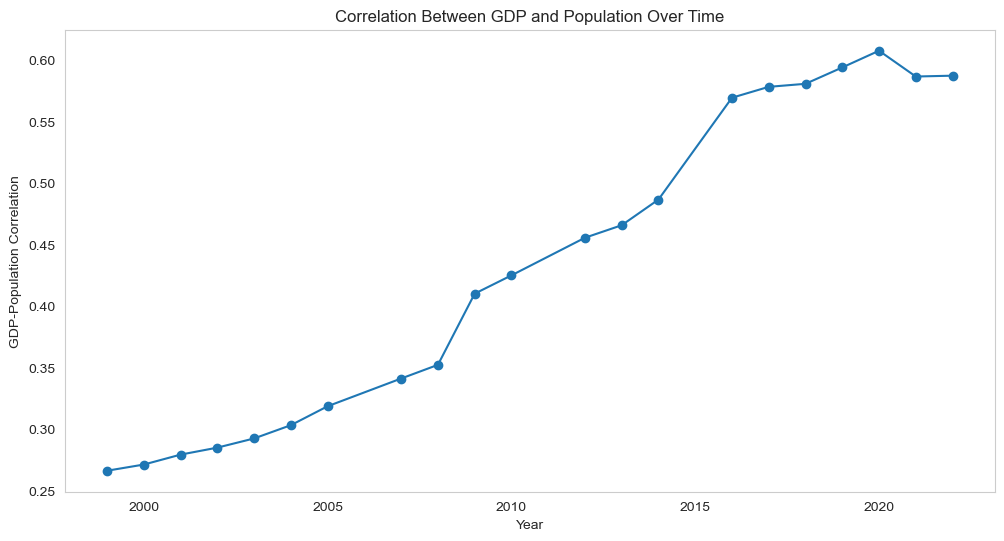

In [145]:
# Convert column heading to integers
gdp_years = sorted([int(col.split()[0]) for col in gdp_cols])
pop_years = sorted([int(col.split()[0]) for col in pop_cols])


# Find the closest population year for each GDP year (For mismatch GDP and population data)
closest_pop_years = {year: min(pop_years, key=lambda x: abs(x - year)) for year in gdp_years}

# Compute correlation between GDP and the nearest population data
correlations = {}
for gdp_year in gdp_years:
    pop_year = closest_pop_years[gdp_year]  # Find closest population year
    corr = df_back[f"{gdp_year} GDP"].corr(df_back[f"{pop_year} population"])  # Pearson correlation
    correlations[gdp_year] = corr

# Convert to DataFrame for plotting
corr_df = pd.DataFrame(list(correlations.items()), columns=["Year", "Correlation"])

# Plot the correlation over time
plt.figure(figsize=(12, 6))
plt.plot(corr_df["Year"], corr_df["Correlation"], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("GDP-Population Correlation")
plt.title("Correlation Between GDP and Population Over Time")
plt.grid()
plt.show()

In general, GDP is expected to increase as the population grows because a larger population means a more extensive workforce, leading to higher production of goods and services. Additionally, a higher population drives greater consumption, which fuels economic growth, while larger countries often have more resources and infrastructure to support expansion. 

Beyond population size, technological advancements, productivity, trade policies, and industrial development also play a crucial role in GDP growth. The correlation coefficient (r) quantifies the strength of the relationship between GDP and population, ranging from 1 (perfect positive correlation) to -1 (perfect negative correlation). To find how GDP relates to population, we decided to find the correlation between these 2 variables for each year in the data set. It is noted that there are many years where the GDP does not match the Population data of the same year. When this occurs, GDP data is compared with the closest population year data. 


A positive correlation suggests that countries with larger populations tend to have higher GDPs. From the plot above, it can be seen that there is a positive correlation for each year, but the strength of this relationship varies over time. From 1999 to 2010, the correlation was relatively low (~0.25 to 0.4), indicating that population alone did not strongly determine GDP. This could be due to developing countries with large populations but lower GDPs or small, high-GDP nations like Luxembourg and Singapore.  After 2010, the correlation steadily increased to around 0.4-0.6, suggesting that as economies developed, urbanized, and integrated into the global economy, the relationship between population and GDP became more pronounced. Between 2015 and 2022, the correlation stabilized at around 0.6, reflecting a moderately strong positive relationship, though it slightly declined after 2021, possibly due to economic shocks like COVID-19 affecting GDP more than population growth. 

Overall, while the plot confirms a positive correlation between GDP and population, its strength has increased over time. Initially weak (~0.3), the correlation strengthened (~0.6) as economies grew and global trade expanded, making population a more significant factor in GDP growth. Although a correlation coefficient of ~0.6 indicates a moderately strong relationship, it is not exceptionally high. This suggests that while population size influences GDP, it is not the sole determining factor. Other elements, such as productivity, economic policies, and external market conditions, also play a crucial role in shaping economic growth.


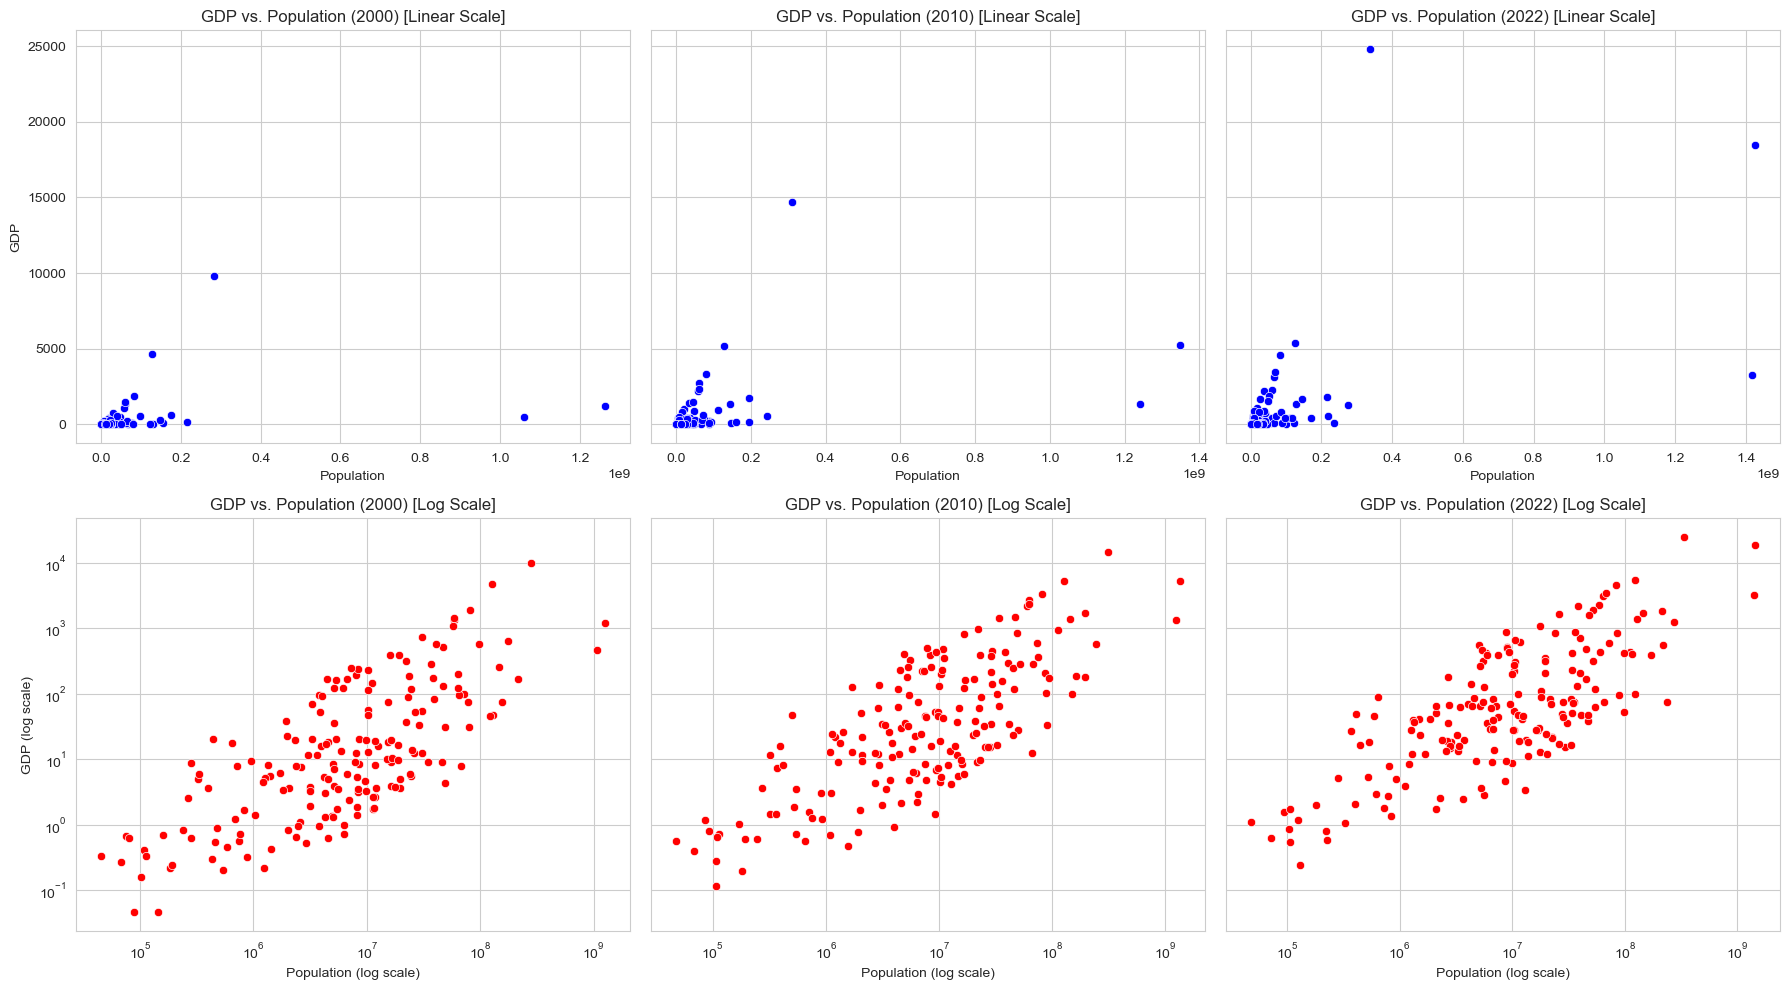

In [147]:
# First, Medium, and last years
years = [2000, 2010, 2022]

# Set up the figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey='row')

for i, year in enumerate(years):
    gdp_col = f"{year} GDP"
    pop_col = f"{year} population"
    
    # Scatter plot
    sns.scatterplot(x=df_back[pop_col], y=df_back[gdp_col], ax=axes[0, i], color='blue')

    #Linear Scale Scatter Plot
    sns.scatterplot(x=df_back[pop_col], y=df_back[gdp_col], ax=axes[1, i], color='red')
    axes[0, i].set_xlabel("Population")
    axes[0, i].set_ylabel("GDP")
    axes[0, i].set_title(f"GDP vs. Population ({year}) [Linear Scale]")
    
    # Labels and Titles
    #Log scale
    axes[1, i].set_xscale("log")  
    axes[1, i].set_yscale("log")  
    axes[1, i].set_xlabel("Population (log scale)")
    axes[1, i].set_ylabel("GDP (log scale)")
    axes[1, i].set_title(f"GDP vs. Population ({year}) [Log Scale]")



plt.tight_layout()
plt.show()

The six scatterplots above illustrate the relationship between GDP and population over time, with both linear and logarithmic scales. Population is on the x-axis and GDP is on the y-axis.


In all three years (2000, 2010, and 2022), the linear-scale plots show a highly skewed distribution. A few countries with extremely high GDP and population (e.g., the U.S., China, and India) dominate the top right, while most nations cluster near the origin. This makes it difficult to discern a clear trend, though a positive relationship is implied. The slope appears steep for a few outliers but nearly flat for smaller economies, making it hard to extract meaningful insights. The intercept is effectively at the origin, as no country has a GDP without a population.


The log-log plots reveal a much clearer positive linear trend in all three years, indicating that GDP and population grow together in a near-proportional relationship. The slopes remain fairly consistent over time, suggesting that larger populations generally correspond to higher GDPs at a similar rate across different periods. The steepness of the trend is moderate, implying that GDP increases significantly with population but not at a one-to-one rate. For example, doubling population does not necessarily mean double the GDP. The intercept shifts slightly over time, reflecting overall global GDP growth. However, the fact that the points remain rather spread indicates that while population is an important factor, other economic influences (technology, industrialization, productivity) also impact GDP.


Between 2000 and 2022, the scatterplots show a slightly stronger trend in the log-log plots, suggesting that the relationship between GDP and population became more defined over time. The spread of points appears somewhat more aligned with the positive slope in 2022 than in 2000, possibly reflecting increased global economic integration and development. However, variation still exists, meaning GDP is not purely dependent on population.


In summary, while the linear scale makes it difficult to interpret trends, the log-log transformation reveals a strong and relatively stable positive correlation between GDP and population, with a moderate slope and a shifting intercept as global economic output grows over time.

## Task 6

In [153]:
# Create a copy of df_back so we don't modify it directly
df_back_task6 = df_back.copy()

# Identify columns containing "GDP"
gdp_cols = [col for col in df_back_task6.columns if "GDP" in col]

# Remove columns with GDP, growth rate, and world percentage from the copy
df_back_task6.drop(
    columns=gdp_cols + ["growth rate", "world percentage"],
    inplace=True
)

# Convert wide format to long format
df_long = df_back_task6.melt(
    id_vars=["country"], 
    var_name="Year", 
    value_name="Population"
)

# Extract the numeric part of the Year
df_long["Year"] = df_long["Year"].str.extract(r"(\d+)").fillna(0).astype(int)

#display(df_long.head())

# Define future years to predict
future_years = [2030, 2040, 2050]

# Store predictions
predictions_list = []

# Loop through each country
for country in df_long["country"].unique():
    country_data = df_long[df_long["country"] == country]
    
    # Ensure there are at least 2 data points to fit a model
    if len(country_data) < 2:
        continue
    
    # Prepare X (Year) and y (log(Population))
    X = country_data["Year"].values.reshape(-1, 1)
    y_log = np.log(country_data["Population"].values)
    
    # Fit log-linear regression model
    model = LinearRegression()
    model.fit(X, y_log)
    
    # Predict population for future years
    for fy in future_years:
        log_pred = model.predict([[fy]])[0]  # Predict log(Population)
        pop_pred = np.exp(log_pred)         # Convert back to actual population
        
        predictions_list.append({
            "Country": country,
            "Year": fy,
            "PredictedPopulation": pop_pred
        })

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions_list)
#display(predictions_df.head())

# Retrieve the top 5 countries for each future year
top_countries_list = []

for fy in future_years:
    # Filter predictions for the given year
    subset = predictions_df[predictions_df["Year"] == fy].copy()
    
    # Get the top 5 countries with the highest population
    top_5_countries = subset.nlargest(5, "PredictedPopulation")
    
    # Store the results
    for _, row in top_5_countries.iterrows():
        top_countries_list.append({
            "Year": fy,
            "Country": row["Country"],
            "Predicted Population": row["PredictedPopulation"]
        })

# Convert to DataFrame
top_5_countries_df = pd.DataFrame(top_countries_list)
#print(top_5_countries_df)

This gives the top 5 countries predicted to have largest population in years 2030, 2040, 2050. We could use bar chart to compare these 
countries in population 

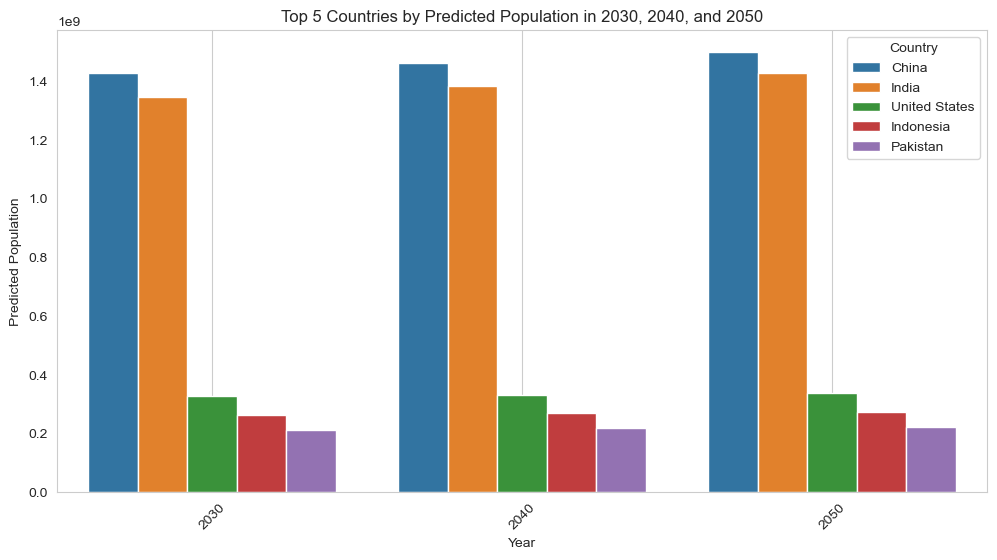

In [155]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar chart
sns.barplot(data=top_5_countries_df, x="Year", y="Predicted Population", hue="Country")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Predicted Population")
plt.title("Top 5 Countries by Predicted Population in 2030, 2040, and 2050")
plt.legend(title="Country")
plt.xticks(rotation=45)
plt.grid()

# Show plot
plt.show()

Our dataset contains information on population trends across various countries, allowing us to project future populations for the years 2030, 2040, and 2050. Given that countries with high current populations already have an advantage in these predictions, it is important to recognize that growth rates may vary significantly over time. As such, while a country with the highest current growth rate may see significant increases, it is not guaranteed to maintain this trend in the long term.

To deal with this question, we cleaned the dataset further by removing irrelevant columns. We then applied a log-linear regression model from the scikit-learn package, using past population data to predict values for 2030, 2040, and 2050.

According to our model, the top three most populous countries in 2030, 2040, and 2050 are:India, China and the United States. India is predicted to have a population of 1.56, 1.73, 1.90 billion in 2030, 2040, 2050 respectively. For China, it is 1.54, 1.66, 1.77 billion and for the United States it is 363, 390 and 418 million. Our bar chart visualization effectively displays the comparative differences between these three dominant countries. We observe that India is projected to surpass China in population growth, a trend consistent with external demographic projections. The United States, while significantly smaller in population compared to India and China, maintains steady growth over the projected years.

Our results align with external demographic studies, suggesting that our log-linear regression model provides reasonable estimates. However, there are some limitations to our approach. Firstly, we have limited data points as our dataset contains population records from only a few years after cleaning (e.g. 2000, 2010, 2015, 2020, 2022). Also, large gaps between years (e.g., 10-year intervals) reduce the model’s ability to capture short-term fluctuations. Secondly, predicting decades into the future relies on the assumption that past trends continue, which may not always be true. Changes in fertility rates, migration, and policy decisions can significantly alter future populations. Finally, a log-linear regression model assumes steady exponential growth, which may not be accurate for all countries. Some countries may follow polynomial, logistic, or other non-linear trends that a simple regression model does not capture.

Overall, our projections are reasonable and align with well-established demographic trends. However, a more comprehensive analysis—incorporating non-linear models, regional growth variations would improve accuracy. Future research should also consider external factors such as economic development, climate change, and healthcare advancements, which significantly influence long-term population growth.

## Task 7

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


pop_cols = [col for col in df_log.columns if "population" in col]

all_pop_columns = ["country"] + pop_cols

# Now extract those columns and set index to "country":
pop_data = df_back[all_pop_columns].set_index("country")

#display(pop_data)

In [159]:
years = pop_data.columns  # e.g. ['1990 population','2000 population',...]
growth_rates = pd.DataFrame(index=pop_data.index)

# Calculating the growth rate for each period
# the period is from 2000-2010, 2000-2015, 2015-2020, 2020-2022
for i in range(len(years) - 1):
    start_col = years[i]      
    end_col   = years[i + 1]  
    # Extract numeric year from each column name
    start_year = int(start_col.split()[0])
    end_year   = int(end_col.split()[0])

    # we define "annual growth rate" over that range
    # Growth factor ^(1/delta_t) - 1
    delta_t = (end_year - start_year)
    rate = (pop_data[end_col] / pop_data[start_col]) ** (1/delta_t) - 1

    # Convert to percentage
    growth_rates[f"{start_year}-{end_year}"] = rate * 100

#display(growth_rates)



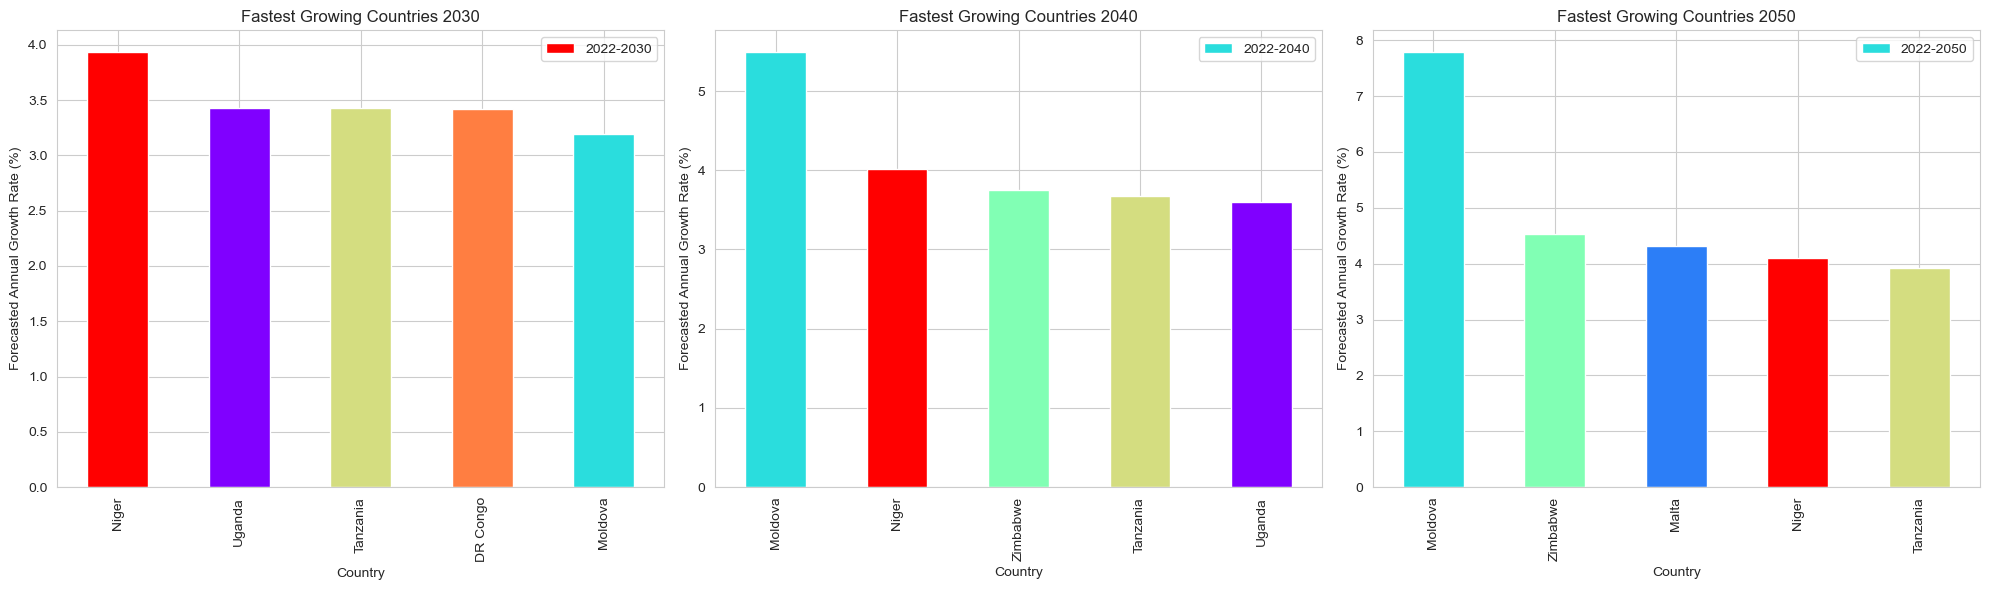

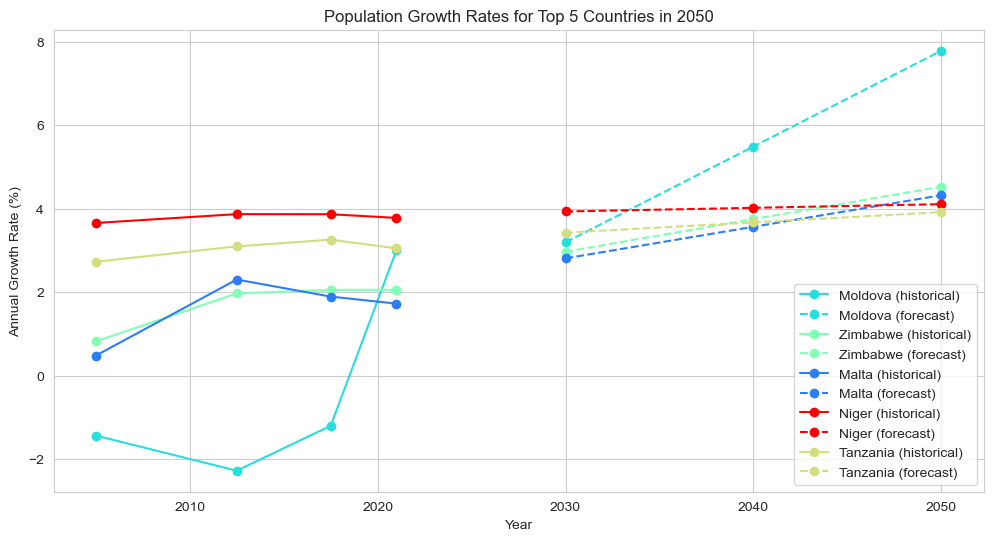

In [161]:
# We will fit a simple linear regression to these historical
# growth rates in order to predict 2030, 2040, 2050.
#      x = known historical mid-years
#      y = observed annual growth rates

# We need to decide on x-values for each column in growth_rates
# For instance, if we have "1990-2000", we might pick x=1995 for that period.
def midpoint_of_period(period_str):
    # e.g. "1990-2000" -> midpoint=1995
    start, end = period_str.split("-")
    return 0.5*(int(start)+int(end))

xvals = []
for col in growth_rates.columns:
    xvals.append(midpoint_of_period(col))
xvals = np.array(xvals)  # e.g. array([1995, 2005, 2015, ...])

# The future years we want to predict
future_years = np.array([2030, 2040, 2050])

# Prepare a DataFrame to store forecasted growth rates
forecasts = pd.DataFrame(index=growth_rates.index,
                         columns=future_years.astype(str))

# For each country, do a linear regression on (xvals, yvals)
for country in growth_rates.index:
    # yvals are the known annual growth rates
    yvals = growth_rates.loc[country].dropna().values
    X = xvals[:len(yvals)].reshape(-1,1)  # shape (n,1)
    y = yvals.reshape(-1,1)
    model = LinearRegression()
    model.fit(X, y)

    # Predict for future years
    pred = model.predict(future_years.reshape(-1,1)).flatten()
    # Store in DataFrame
    forecasts.loc[country, future_years.astype(str)] = pred

# Convert to numeric
forecasts = forecasts.apply(pd.to_numeric, errors="coerce")

# Identify top 5 fastest growing countries in 2030, 2040, 2050
def get_top5_countries(year):
    # year is int, e.g. 2030
    # find top 5 in that column (largest growth rate)
    return forecasts[ str(year) ].nlargest(5).index

top5_2030 = get_top5_countries(2030)
top5_2040 = get_top5_countries(2040)
top5_2050 = get_top5_countries(2050)



# We make bar plots for the top 5 in each year
unique_countries = list(set(top5_2030) | set(top5_2040) | set(top5_2050))

# create a color map for them
colors = plt.cm.rainbow(np.linspace(0,1,len(unique_countries)))
color_map = dict(zip(unique_countries, colors))

fig, axes = plt.subplots(1, 3, figsize=(20,6))

# plotting the bar plots
for ax, year, top5 in zip(axes,
                          [2030, 2040, 2050],
                          [top5_2030, top5_2040, top5_2050]):

    # Make a small DataFrame with only these 5 countries, for the chosen year
    subdf = forecasts.loc[top5, str(year)]
    
    # Bar plot
    subdf.plot(kind="bar",
               ax=ax,
               color=[color_map[c] for c in subdf.index])
    ax.set_title(f"Fastest Growing Countries {year}")
    ax.set_xlabel("Country")
    ax.set_ylabel(f"Forecasted Annual Growth Rate (%)")
    ax.legend([f"{start}-{year}" for start in [2022, 2023]])  # or a relevant label

#display(subdf)
plt.tight_layout()
plt.show()



#  Plot historical vs forecast lines for top5_2050
#  to mirror the "Population Growth Rates for Top 5 Countries in 2050" chart
fig, ax = plt.subplots(figsize=(12,6))

for country in top5_2050:
    # historical_data is e.g. growth_rates columns "1990-2000", "2000-2010", ...
    # We plot them against xvals.
    yvals = growth_rates.loc[country].dropna().values
    # xvals are midpoints of each period
    # Plot historical
    if len(yvals)>0:
        ax.plot(xvals[:len(yvals)],
                yvals,
                marker="o",
                color=color_map[country],
                label=f"{country} (historical)")

    # forecast_data for [2030,2040,2050]
    if country in forecasts.index:
        forecast_vals = forecasts.loc[country, future_years.astype(str)]
        if forecast_vals.notnull().all():
            ax.plot(future_years,
                    forecast_vals,
                    marker="o",
                    linestyle="--",
                    color=color_map[country],
                    label=f"{country} (forecast)")

ax.set_title("Population Growth Rates for Top 5 Countries in 2050")
ax.set_xlabel("Year")
ax.set_ylabel("Annual Growth Rate (%)")
ax.legend()
plt.show()


This task involves forecasting future growth for specific countries. In particular, the aim is to identify which countries are predicted to experience the highest growth rates in 2030, 2040, and 2050. By the term "growing the quickest," we interpret the question as referring to the countries with the highest percentage increases in population. Using percentage growth rates allows for equitable comparison across countries, ensuring smaller nations with significant relative increases are fairly represented alongside larger countries.

To achieve these predictions, we chose to use a linear regression model based on the available historical data. As with last year's approach, we determined the annual population growth rate for each country from the available dataset starting from the earliest relevant data points (around 2005-2010 in our case). We computed the annual growth rate carefully, as the dataset provided values at intervals of several years. Thus, we ensured that our growth rates accurately reflected annual percentage increases, regardless of the interval duration between data points.

After calculating the historical annual growth rates, we created linear regression models for each country. These models enabled predictions for the future years of interest: 2030, 2040, and 2050. While the linear models may not perfectly reflect real-world non-linearities in population growth, they provide valuable insights into long-term trends based on historical data. Additionally, it's important to recognize that countries with the steepest gradient (highest increase in growth rate) are not necessarily those that will have the absolute highest growth rates in the future. A country may have a lower initial growth rate but a rapidly increasing trend, potentially placing it among the top growth-rate countries by 2050.

To visually demonstrate our findings, we generated three histograms illustrating the top five fastest-growing countries in 2030, 2040, and 2050, along with a line graph depicting historical and forecasted growth rates for the top five countries in 2050.

Observing our histograms, several intriguing insights emerge. Notably, Niger appears prominently as the country expected to experience the highest growth rate in 2030, followed closely by Uganda, Tanzania, the Democratic Republic of Congo, and Moldova. Moving toward 2040, the order of these countries shifts significantly, with Moldova predicted to have the highest growth rate by a noticeable margin, followed by Niger, Zimbabwe, Tanzania, and Uganda. By 2050, Moldova maintains its lead with an even higher margin of growth, while Zimbabwe, Malta, Niger, and Tanzania fill out the rest of the top five positions. The changing order clearly highlights the dynamic nature of country growth rates over time, justifying our choice to display five countries to illustrate how rankings can evolve over decades.

Analyzing the linear graph in more depth offers further valuable observations. Moldova, for instance, starts with a comparatively lower and highly variable historical growth rate, including negative values around 2015, yet its forecast indicates a steep and sustained rise. This is precisely why Moldova, despite initially lagging behind countries such as Niger and Tanzania, emerges as the fastest-growing country in both 2040 and 2050.

In contrast, Niger shows consistently higher historical growth rates but experiences a relatively modest increase over time, resulting in its lower rank by 2050. Zimbabwe and Malta, both absent from the 2030 top five, emerge prominently by 2040 and 2050 due to their strong positive growth trajectories. This emphasizes the importance of considering long-term trends rather than initial growth rates alone.

It's also interesting to note that Uganda, initially second-highest in growth for 2030, slips to fifth place by 2040 and falls off the top-five list by 2050. This is reflective of its flatter growth gradient in the linear model, suggesting diminishing relative growth compared to other emerging countries. Tanzania experiences a similar trend, highlighting that early rapid growth doesn't guarantee continued high rankings.

Lastly, our linear model, like the one previously discussed, assumes continuous linear growth without plateauing. This assumption means that long-term predictions can become unrealistic if projected too far into the future. However, within the scope of the upcoming decades (2030, 2040, and 2050), this limitation doesn't significantly impact the practical utility of our forecasts. It provides a clear indication of which countries are expected to experience rapid growth in population rates in the coming decades.

Overall, our analysis and visualizations effectively communicate anticipated population growth trends, highlighting Moldova, Niger, Zimbabwe, Malta, and Tanzania as key countries with notable growth rate increases by mid-century.

## Task 8

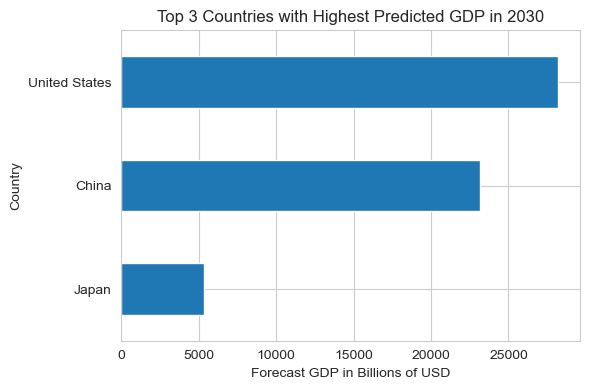

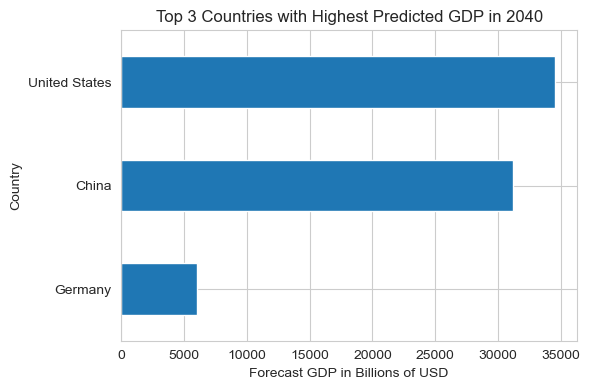

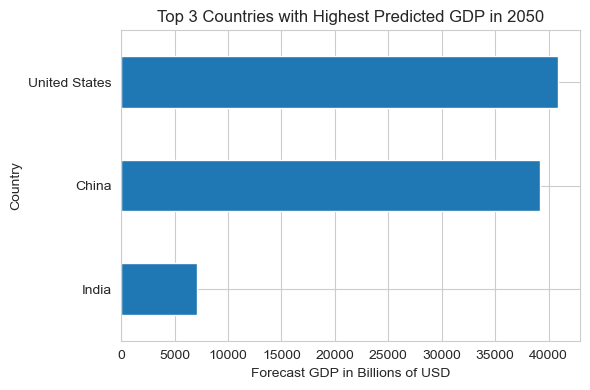

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


all_cols = df_back.columns.tolist()
gdp_cols = [c for c in all_cols if "gdp" in c.lower() and "country" not in c.lower()]

# Create a sub-DataFrame with [country] plus all gdp columns
df_gdp = df_back[["country"] + gdp_cols].copy()
df_gdp = df_gdp.set_index("country")
#display(df_gdp)

#  For each country, extract (year, GDP) pairs, fit a linear model,
#  and predict GDP in 2030, 2040, 2050.
#  We'll store the predictions in a dictionary: predictionsGDP.
predictionsGDP = {}  # keys: country, value: [GDP2030, GDP2040, GDP2050]

future_years = np.array([[2030],[2040],[2050]])  # shape (3,1)

for country in df_gdp.index:
    # Extract the row for that country, which has columns like "1999 GDP", "2000 GDP", etc.
    row_series = df_gdp.loc[country].dropna()  # drop missing

    # Build lists for X=years, y=GDP
    X_years = []
    y_gdp   = []

    for col in row_series.index:
        # Example:
        try:
            year_str = col.split()[0]        # e.g. "1999"
            year_int = int(year_str)
        except:
            continue  # skip if we can't parse

        val = row_series[col]
        if pd.notnull(val):
            X_years.append(year_int)
            y_gdp.append(val)

    # Must have at least 2 data points to fit a line
    if len(X_years) >= 2:
        X_arr = np.array(X_years).reshape(-1,1)
        y_arr = np.array(y_gdp).reshape(-1,1)

        model = LinearRegression()
        model.fit(X_arr, y_arr)

        # Predict for [2030, 2040, 2050]
        pred = model.predict(future_years).flatten()
        predictionsGDP[country] = pred
    else:
        # Not enough data; skip or store zeros
        predictionsGDP[country] = [np.nan, np.nan, np.nan]


#  Convert predictionsGDP to a DataFrame with index=[2030,2040,2050]
#  and columns=all countries.  Then we can easily do .nlargest(3).
predictionsGDP_df = pd.DataFrame(predictionsGDP,
    index=[2030, 2040, 2050]).transpose()
# So now predictionsGDP_df.loc[country] = [GDP2030, GDP2040, GDP2050]
# and predictionsGDP_df.columns = [2030, 2040, 2050]



# For each year, pick the top 3 and make a horizontal bar chart
def plot_top3_for_year(year):
    # year is an integer, e.g. 2030
    colname = year
    top3 = predictionsGDP_df[colname].nlargest(3)  # a Series with 3 countries

    fig, ax = plt.subplots(figsize=(6,4))
    # Plot as a horizontal bar chart
    top3.sort_values().plot(kind='barh', ax=ax)

    ax.set_title(f"Top 3 Countries with Highest Predicted GDP in {year}")
    ax.set_xlabel("Forecast GDP in Billions of USD")
    ax.set_ylabel("Country")

    plt.tight_layout()
    plt.show()

# Make the 3 separate plots for 2030, 2040, 2050
plot_top3_for_year(2030)
plot_top3_for_year(2040)
plot_top3_for_year(2050)


Our datasets contain data regarding population and Gross Domestic Product (GDP) for various countries. This particular task requires forecasting the GDP of each country in the years 2030, 2040, and 2050, and then identifying the countries expected to have the largest GDP in those respective years.

It is logical to expect countries that already had high GDP in recent years (for instance, 2022) to maintain an advantage in these forecasts, although long-term economic growth rates can fluctuate considerably, impacting rankings over time.

To approach this task, we first extract a subdataframe named df_gdp from our preprocessed dataset df_back, then we utilized a linear regression model (from the scikit-learn package) to forecast GDP values for each country in the years 2030, 2040, and 2050.
Our results indicate that the top three countries predicted to have the highest GDP in 2030 are, firstly, the United States, followed closely by China, with Japan ranking third. However, the forecasted rankings shift slightly in the subsequent decades: by 2040, the top two positions remain unchanged with the United States first and China second, but Germany emerges in third place, replacing Japan. By 2050, the United States still maintains its top position, China remains second, and India emerges to claim the third spot, overtaking Germany and Japan.

Examining the projected GDP figures in detail, the United States' GDP is anticipated to reach approximately $27$ trillion in 2030, rising significantly to around $34$ trillion by 2040, and continuing upward to about $40$ trillion by 2050. China’s GDP also shows substantial growth: approximately $23$ trillion in 2030, increasing to $30$ trillion by 2040, and nearly matching the United States by reaching approximately $38$ trillion in 2050. Japan’s GDP, projected at around $6$ trillion in 2030, is subsequently overtaken by Germany, whose GDP reaches around $7$ trillion by 2040. By 2050, India emerges strongly with a GDP of approximately $8 trillion, surpassing both Germany and Japan to enter the top three. These figures have been rounded to two significant figures for clarity.

These projected results align well with current global economic trends. The United States and China have consistently held leading positions in global economic rankings, and India's emergence by 2050 aligns with widely recognized global growth forecasts.

We chose to visually represent our results through bar charts, creating one chart per forecasted year. This clearly displays both the rankings and the magnitude differences between the GDP of each of the top countries.

The strength of our results lies in their realistic alignment with projections from more sophisticated economic models, despite our reliance on simpler methods. Given our forecast targets of 2030, 2040, and 2050—relatively close to the latest data point of 2022—our linear regression projections are likely to offer reasonably accurate insight.

Nevertheless, some limitations exist. More data points would enhance our accuracy, as our current dataset is limited and has gaps in the historical GDP data. Additionally, linear extrapolation is inherently limited, as economies rarely grow at a constant rate indefinitely; real-world GDP trajectories often involve periods of acceleration, stagnation, or decline that a simple linear model cannot fully capture. Different countries may also have unique economic trajectories better represented by polynomial or logarithmic models.

In conclusion, while our projected rankings and GDP values appear plausible and realistic, the accuracy of these forecasts could be improved through comparison with more complex models and richer datasets. However, these results do offer a valuable, reasonable prediction of which countries will have the largest GDP in the coming decades.

## Task 9

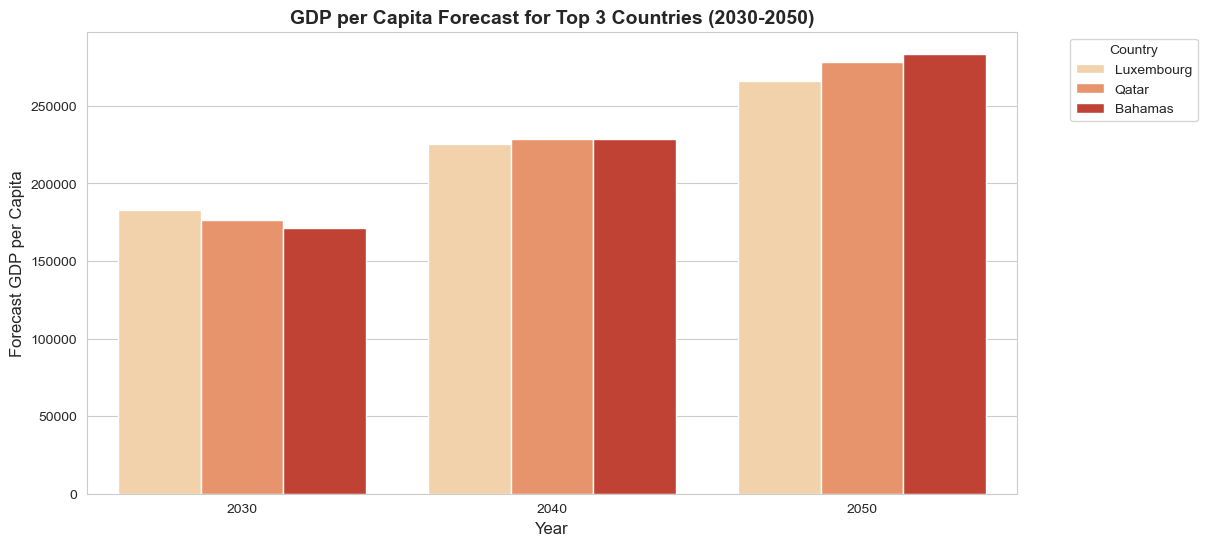

In [172]:
# Convert predictions_df into same format as predictionsGDP_df
predictionsPopul_df = predictions_df.pivot(index="Country", columns="Year", values="PredictedPopulation")
predictionsPopul_df.columns = predictionsPopul_df.columns.astype(int)
predictionsPopul_df.reset_index(inplace=True)
predictionsPopul_df.columns.name = None

# Reset index to make "Country" a column
predictionsGDP_df.reset_index(inplace=True)
predictionsGDP_df.rename(columns={"index": "Country"}, inplace=True)

# Find common countries
CommonCountries = set(predictionsPopul_df["Country"]).intersection(set(predictionsGDP_df["Country"]))

# Filter both dataframes for common countries
predictionsPopul_df = predictionsPopul_df[predictionsPopul_df["Country"].isin(CommonCountries)]
predictionsGDP_df = predictionsGDP_df[predictionsGDP_df["Country"].isin(CommonCountries)]

# Remove countries where ALL predicted populations are zero
nonZeroCountries = predictionsPopul_df.loc[(predictionsPopul_df.iloc[:, 1:] != 0).all(axis=1), "Country"]
predictionsPopul_df = predictionsPopul_df[predictionsPopul_df["Country"].isin(nonZeroCountries)]
predictionsGDP_df = predictionsGDP_df[predictionsGDP_df["Country"].isin(nonZeroCountries)]

# Set country as index for calculations
predictionsPopul_df.set_index("Country", inplace=True)
predictionsGDP_df.set_index("Country", inplace=True)

predictionsGDP_df *= 1e9  # Convert from billions to actual USD

# Calculate GDP per capita
predictionsGDPPC_df = predictionsGDP_df / predictionsPopul_df

# Find 3 biggest GDP per capita for 2030, 2040, and 2050
top3GDPPC_2030 = predictionsGDPPC_df[2030].nlargest(3)
top3GDPPC_2040 = predictionsGDPPC_df[2040].nlargest(3)
top3GDPPC_2050 = predictionsGDPPC_df[2050].nlargest(3)


# Combine top 3 into a single DataFrame
top_gdp_pc_df = pd.DataFrame({
    "Country": list(top3GDPPC_2030.index) + list(top3GDPPC_2040.index) + list(top3GDPPC_2050.index),
    "GDP per Capita": list(top3GDPPC_2030.values) + list(top3GDPPC_2040.values) + list(top3GDPPC_2050.values),
    "Year": [2030] * 3 + [2040] * 3 + [2050] * 3
})

# Set style
sns.set_style("whitegrid")

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_gdp_pc_df,
    x="Year",
    y="GDP per Capita",
    hue="Country",
    palette="OrRd",
    dodge=True  # Group bars instead of stacking
)

# Titles + labels
plt.title("GDP per Capita Forecast for Top 3 Countries (2030-2050)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Forecast GDP per Capita", fontsize=12)

# Adding legends
plt.legend(title="Country", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


GDP per capita is a key economic indicator representing the total economic output of a country divided by its population. To calculate this, we utilized the overall GDP data discussed in Task 8 and divided it by the population figures reviewed in Task 6. This metric is widely recognized as an effective way to evaluate a nation's economic health and its citizens' quality of life. In this analysis, our primary goal is to identify the countries expected to achieve the highest GDP per capita in the years 2030, 2040, and 2050.

Generally, countries with strong economies and smaller populations tend to rank higher in GDP per capita analyses. To ensure accuracy, we refined datasets from Tasks 6 and 8, specifically ranking countries by their population sizes and GDP levels. This process enabled us to concentrate on the 180 countries for which we had complete and reliable GDP and population data. We calculated projected GDP per capita values for the selected future years using these refined datasets.

To effectively present our findings, we employed bar charts highlighting the three countries projected to have the highest GDP per capita in each targeted year. This visual representation clearly illustrates economic shifts and facilitates straightforward comparison over time. Interestingly, the same three nations—Luxembourg, Qatar, and the Bahamas—consistently appear among the top positions across all forecasted years, underscoring their sustained economic strength and potential.

Our detailed analysis of GDP per capita projections reveals significant economic shifts for Luxembourg, Qatar, and the Bahamas over the next decades. In 2030, Luxembourg is projected to lead with an approximate GDP per capita of \\$180,000, followed closely by Qatar at around \\$175,000 and the Bahamas at approximately \\$170,000.  However, by 2040, we anticipate Qatar and the Bahamas to have similar GDP per capita at about \\$230,000, while Luxembourg's growth slows significantly to about \\$225,000. By 2050, the Bahamas emerges with remarkable growth, leading with roughly \\$280,000. Qatar maintains a strong position in second place at about \\$275,000, and Luxembourg continues a modest downward trend, landing in third place at \\$260,000.

One positive takeaway from our analysis is its consistency with projections made by more complex statistical models using extensive datasets. Given that our forecast horizon (2030, 2040, 2050) isn't too distant from our latest available data (2023), we believe our predictions remain realistic and credible. Naturally, if we were forecasting farther into the future, such as the year 3000, the accuracy of our projections might significantly diminish.

We acknowledge that broader access to more continuous data might enhance the precision of our GDP per capita forecasts. Our analysis faced constraints due to limited GDP data availability—specifically, data gaps between 2009 and 2012, as well as in 2020. This limitation required us to rely on extrapolation, which introduces uncertainties since numerous economic or demographic shifts could occur over time.

Lastly, while we used a linear regression model for simplicity, it's important to recognize that other methods, such as polynomial or logarithmic regression, might be better suited for some countries’ specific economic conditions.

Overall, we find our predictions reasonable and insightful. Although comparing our results against more sophisticated analyses would provide further validation, we believe our projected figures present credible and meaningful insights into future global economic standings.